In [1]:
%run Global.ipynb
%run Helper_Functions.ipynb

In [2]:
train_df_oe = pd.read_csv(DATASET_DIR + "/train_df_oe_200.csv", keep_default_na=False)
y = train_df_oe.iloc[:,-1]
X = train_df_oe.iloc[:,:-1]

In [3]:
train_df_oe

Authors  PublishYear  PublishMonth  PublishDay  Publisher  pagesNumber  \
0       8046.0         13.0           3.0         0.0     3917.0          0.0   
1       6185.0         12.0           5.0         0.0     1180.0          2.0   
2       3220.0         13.0           1.0         6.0      850.0          0.0   
3       2368.0         13.0           4.0         0.0      493.0          1.0   
4      15253.0         13.0           3.0         1.0     3031.0          1.0   
...        ...          ...           ...         ...        ...          ...   
23058   6887.0         12.0           3.0         0.0        0.0          0.0   
23059   3613.0         13.0           3.0         0.0     1941.0          0.0   
23060   2054.0         12.0           1.0         3.0     3468.0          0.0   
23061   7029.0         13.0           2.0         4.0     2741.0          0.0   
23062  16598.0         13.0           3.0         2.0     3257.0          0.0   

       gay_lesbian  secret_life  american_indian  twentieth_century  ...  \
0              0.0          0.0              0.0                0.0  ...   
1              0.0          0.0              0.0                0.0  ...   
2              0.0          0.0              0.0                0.0  ...   
3              0.0          0.0              0.0                0.0  ...   
4              0.0          0.0              0.0                0.0  ...   
...            ...          ...              ...                ...  ...   
23058          0.0          0.0              0.0                0.0  ...   
23059          0.0          0.0              0.0                0.0  ...   
23060          0.0          0.0              0.0                0.0  ...   
23061          0.0          0.0              0.0                0.0  ...   
23062          0.0          0.0              0.0                0.0  ...   

       time book  color photograph  san francisco  easy follow  new testament  \
0            0.0          0.000000            0.0          0.0            0.0   
1            0.0          0.000000            0.0          0.0            0.0   
2            0.0          0.000000            0.0          0.0            0.0   
3            0.0          0.000000            0.0          0.0            0.0   
4            0.0          0.000000            0.0          0.0            0.0   
...          ...               ...            ...          ...            ...   
23058        0.0          0.000000            0.0          0.0            0.0   
23059        0.0          0.000000            0.0          0.0            0.0   
23060        0.0          0.000000            0.0          0.0            0.0   
23061        0.0          0.000000            0.0          0.0            0.0   
23062        0.0          0.652053            0.0          0.0            0.0   

       young reader  brings together  answer question  paperback edition  \
0               0.0              0.0              0.0                0.0   
1               0.0              0.0              0.0                0.0   
2               0.0              0.0              0.0                0.0   
3               0.0              0.0              0.0                0.0   
4               0.0              0.0              0.0                0.0   
...             ...              ...              ...                ...   
23058           0.0              0.0              0.0                0.0   
23059           0.0              0.0              0.0                0.0   
23060           0.0              0.0              0.0                0.0   
23061           0.0              0.0              0.0                0.0   
23062           0.0              0.0              0.0                0.0   

       rating_label  
0               4.0  
1               4.0  
2               4.0  
3               4.0  
4               3.0  
...             ...  
23058           4.0  
23059           4.0  
23060           4.0  
23061          

# Stacking Naive Bayes

In [4]:
GAUSSIAN_FEATURES = ['PublishYear', 'PublishMonth', 'PublishDay', 'pagesNumber']
CATEGORICAL_FEATURES = ['Authors', 'Publisher']
MULTINOMIAL_FEATURES = list(X.columns)[6:]

GAUSSIAN_FEATURES_ID = [1, 2, 3, 5]
CATEGORICAL_FEATURES_ID = [0, 4]
MULTINOMIAL_FEATURES_ID = range(6, X.shape[1])

In [5]:
N_CAT_VALUES = [19244, 4519]  # number of unique authors, publishers

In [6]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB

In [7]:
# Split the training set for each Naive Bayes base classifier
X_gaussian = X[GAUSSIAN_FEATURES]
X_categorical = X[CATEGORICAL_FEATURES]
X_multinomial = X[MULTINOMIAL_FEATURES]

## Gaussian NB for PublishYear and pagesNumber

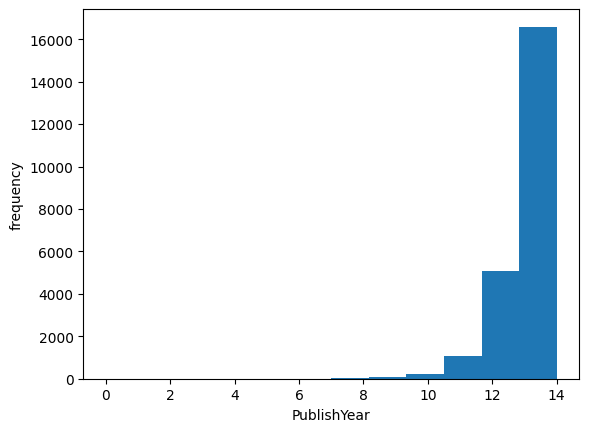

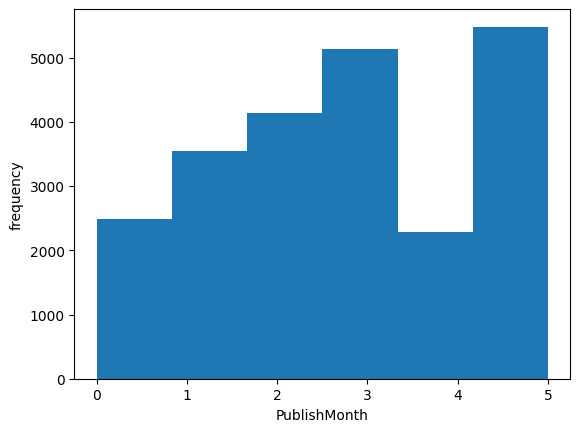

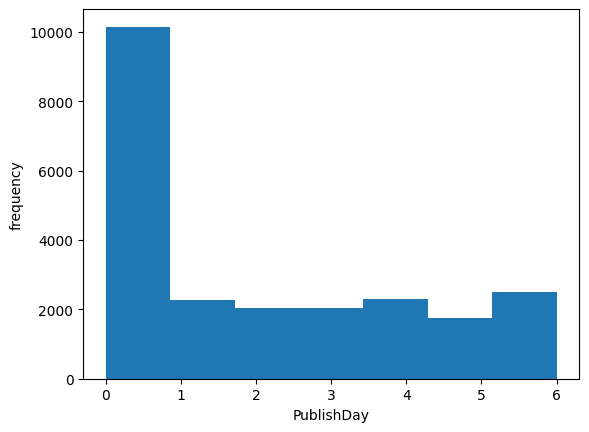

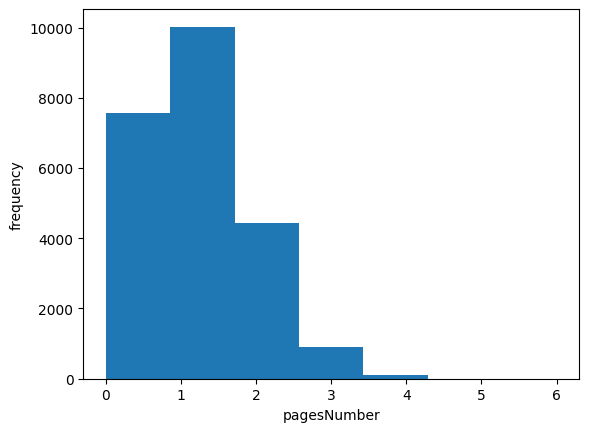

In [8]:
# check distribution of PublishYear and pagesNumber
for feature in GAUSSIAN_FEATURES:
    hist_plot(X, feature, bins=X[feature].nunique())

GaussianNB prediction took 0.10335993766784668 seconds
   test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0                0.0           0.825000           0.056075       0.702211
1                0.0           0.825843           0.126126       0.703945
2                0.0           0.823920           0.086957       0.700910
3                0.0           0.825754           0.125000       0.703816
4                0.0           0.824131           0.087719       0.701214
5                0.0           0.824942           0.106195       0.702515
6                0.0           0.823830           0.104348       0.701214
7                0.0           0.824732           0.089286       0.702082
8                0.0           0.825121           0.074074       0.702515
9                0.0           0.824942           0.125000       0.702949


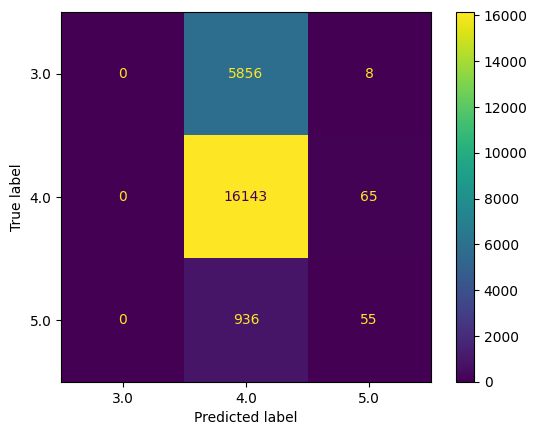

test_3.0_f1-score    0.000000
test_4.0_f1-score    0.824822
test_5.0_f1-score    0.098078
test_accuracy        0.702337
dtype: float64

In [9]:
gnb = GaussianNB()
gnb_pred, gnb_report = cross_val_report(gnb, X_gaussian, y)
gnb_report

## Categorical NB for Authors and Publisher

In [10]:
# Tuning for alpha smoothing
cnb = CategoricalNB(min_categories = N_CAT_VALUES)
param_grid = {'alpha': [i/10 for i in range(1, 15)]}
tune_hyperparameter(cnb, param_grid, X_categorical, y)

# larger alpha -> overestimate the likelihood
# could be because there is more samples with label4 ratings, and the missing values are randomly 
# distributed across the dataset, hence more samples with label4 rating with missing values
# -> likelihood of P(x|c=4) overestimated -> more samples predicted to have label=4

Fitting 20 folds for each of 14 candidates, totalling 280 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END .....................................

[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.7; total time=   0.0s
[CV] END ..........................................alpha=0.7; total time=   0.0s
[CV] END ..........................................alpha=0.7; total time=   0.0s
[CV] END ..........................................alpha=0.7; total time=   0.0s
[CV] END ...................

[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ...................

params  mean_test_3.0_precision  std_test_3.0_precision  \
0   {'alpha': 0.1}                 0.452329                0.021165   
1   {'alpha': 0.2}                 0.473283                0.024629   
2   {'alpha': 0.3}                 0.428745                0.018688   
3   {'alpha': 0.4}                 0.433278                0.020911   
4   {'alpha': 0.5}                 0.434082                0.023026   
5   {'alpha': 0.6}                 0.438044                0.022533   
6   {'alpha': 0.7}                 0.437336                0.023711   
7   {'alpha': 0.8}                 0.426739                0.022831   
8   {'alpha': 0.9}                 0.424329                0.024245   
9   {'alpha': 1.0}                 0.570783                0.040940   
10  {'alpha': 1.1}                 0.571094                0.041972   
11  {'alpha': 1.2}                 0.568859                0.042898   
12  {'alpha': 1.3}                 0.566632                0.042818   
13  {'alpha': 1.4}                 0.563899                0.045466   

    rank_test_3.0_precision  mean_test_3.0_recall  std_test_3.0_recall  \
0                         7              0.469817             0.028781   
1                         6              0.407744             0.028450   
2                        12              0.418143             0.024585   
3                        11              0.393243             0.021996   
4                        10              0.369538             0.019023   
5                         8              0.353509             0.020037   
6                         9              0.337647             0.023262   
7                        13              0.322811             0.023710   
8                        14              0.313604             0.024955   
9                         2              0.215031             0.028377   
10                        1              0.210425             0.028463   
11                        3              0.200537             0.027608   
12                        4              0.191839             0.023206   
13                        5              0.182629             0.022682   

    rank_test_3.0_recall  mean_test_3.0_f1-score  std_test_3.0_f1-score  \
0                      1                0.460606               0.021915   
1                      3                0.437709               0.023871   
2                      2                0.423247               0.020596   
3                      4                0.412169               0.020424   
4                      5                0.399118               0.019815   
5                      6                0.391097               0.019650   
6                      7                0.380919               0.022571   
7                      8                0.367414               0.022845   
8                      9                0.360501               0.024363   
9                     10                0.311859               0.034679   
10                    11                0.306968               0.034943   
11                    12                0.296021               0.034723   
12                    13                0.286220               0.029956   
13                    14                0.275504               0.029965   

    rank_test_3.0_f1-score  ...  rank_test_5.0_precision  \
0                        1  ...                       14   
1                        2  ...                       13   
2                        3  ...                       12   
3                        4  ...                       11   
4                        5  ...                       10   
5                        6  ...                        8   
6                        7  ...                        9   
7                        8  ...                        5   
8                        9  ...                        4   
9                       10  ...                        3   
10                      11  ...                  

CategoricalNB prediction took 0.11936283111572266 seconds
   test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0           0.333333           0.827904           0.122807       0.723017
1           0.310345           0.825981           0.149533       0.719549
2           0.303861           0.824386           0.057692       0.716515
3           0.324723           0.829361           0.130841       0.724198
4           0.342926           0.825838           0.146789       0.722463
5           0.314634           0.825414           0.128440       0.718127
6           0.290446           0.826660           0.132075       0.719428
7           0.306533           0.827791           0.222222       0.722463
8           0.291771           0.822450           0.076923       0.713356
9           0.271447           0.823656           0.144144       0.713790


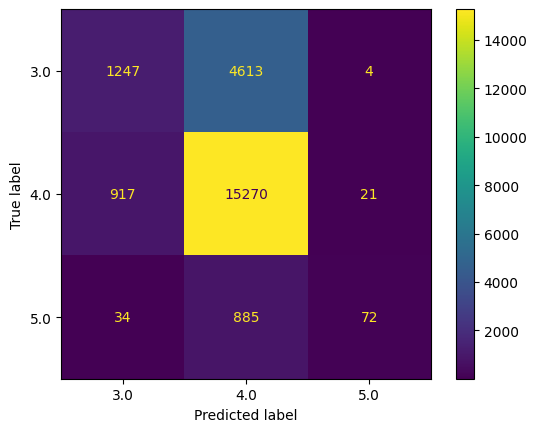

test_3.0_f1-score    0.309002
test_4.0_f1-score    0.825944
test_5.0_f1-score    0.131147
test_accuracy        0.719291
dtype: float64

In [11]:
cnb = CategoricalNB(alpha=1, min_categories = N_CAT_VALUES)
cnb_pred, cnb_report = cross_val_report(cnb, X_categorical, y)
cnb_report

## Multinomial NB for Name and Description

In [12]:
# Tuning for alpha smoothing
mnb = MultinomialNB()
param_grid = {'alpha': [i/10 for i in range(1, 15)]}
tune_hyperparameter(mnb, param_grid, X_multinomial, y)

Fitting 20 folds for each of 14 candidates, totalling 280 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END .....................................

[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ..........................................alpha=0.6; total time=   0.0s
[CV] END ...................

[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ...................

params  mean_test_3.0_precision  std_test_3.0_precision  \
0   {'alpha': 0.1}                 0.565501                0.159383   
1   {'alpha': 0.2}                 0.567444                0.159580   
2   {'alpha': 0.3}                 0.562999                0.161692   
3   {'alpha': 0.4}                 0.561717                0.160760   
4   {'alpha': 0.5}                 0.559293                0.158480   
5   {'alpha': 0.6}                 0.543727                0.168166   
6   {'alpha': 0.7}                 0.546723                0.170545   
7   {'alpha': 0.8}                 0.546723                0.170545   
8   {'alpha': 0.9}                 0.544500                0.170125   
9   {'alpha': 1.0}                 0.547179                0.167842   
10  {'alpha': 1.1}                 0.547179                0.167842   
11  {'alpha': 1.2}                 0.549858                0.165483   
12  {'alpha': 1.3}                 0.549858                0.165483   
13  {'alpha': 1.4}                 0.545361                0.163881   

    rank_test_3.0_precision  mean_test_3.0_recall  std_test_3.0_recall  \
0                         2              0.018418             0.006509   
1                         1              0.018247             0.006497   
2                         3              0.017906             0.006370   
3                         4              0.017735             0.006063   
4                         5              0.017394             0.005487   
5                        14              0.016541             0.005931   
6                        10              0.016371             0.006061   
7                        10              0.016371             0.006061   
8                        13              0.016029             0.006012   
9                         8              0.016029             0.006012   
10                        8              0.016029             0.006012   
11                        6              0.016029             0.006012   
12                        6              0.016029             0.006012   
13                       12              0.015688             0.005844   

    rank_test_3.0_recall  mean_test_3.0_f1-score  std_test_3.0_f1-score  \
0                      1                0.035622               0.012419   
1                      2                0.035301               0.012393   
2                      3                0.034658               0.012176   
3                      4                0.034340               0.011610   
4                      5                0.033700               0.010533   
5                      6                0.032066               0.011394   
6                      7                0.031748               0.011646   
7                      7                0.031748               0.011646   
8                      9                0.031102               0.011553   
9                      9                0.031105               0.011550   
10                     9                0.031105               0.011550   
11                     9                0.031109               0.011546   
12                     9                0.031109               0.011546   
13                    14                0.030458               0.011230   

    rank_test_3.0_f1-score  ...  rank_test_5.0_precision  \
0                        1  ...                       11   
1                        2  ...                       11   
2                        3  ...                       11   
3                        4  ...                       11   
4                        5  ...                        9   
5                        6  ...                        9   
6                        7  ...                        7   
7                        7  ...                        7   
8                       13  ...                        1   
9                       11  ...                        1   
10                      11  ...                  

MultinomialNB prediction took 0.2196509838104248 seconds
   test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0           0.035714           0.823197           0.019802       0.700477
1           0.036424           0.825998           0.039216       0.705245
2           0.029752           0.824463           0.019802       0.702644
3           0.033113           0.825307           0.057692       0.704250
4           0.046281           0.827869           0.077670       0.708586
5           0.026403           0.825218           0.096154       0.703816
6           0.049505           0.827869           0.058824       0.708586
7           0.026534           0.824974           0.019802       0.702949
8           0.026578           0.824674           0.038835       0.702949
9           0.029752           0.825307           0.058252       0.703816


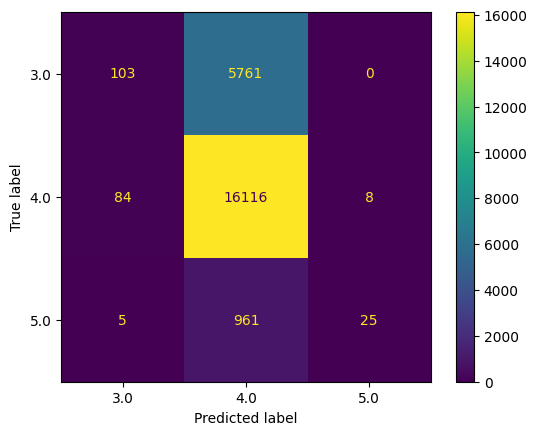

test_3.0_f1-score    0.034006
test_4.0_f1-score    0.825488
test_5.0_f1-score    0.048605
test_accuracy        0.704332
dtype: float64

In [13]:
# better than complementNB and gaussianNB
mnb = MultinomialNB(alpha=0.1)
mnb_pred, mnb_report = cross_val_report(mnb, X_multinomial, y)
mnb_report

## Categorical NB for final prediction

CategoricalNB prediction took 0.11760377883911133 seconds
   test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0           0.344828           0.825588           0.121739       0.720416
1           0.310345           0.825887           0.165138       0.719549
2           0.315789           0.823944           0.076190       0.716948
3           0.332524           0.828618           0.178571       0.724198
4           0.342926           0.826514           0.196429       0.723764
5           0.324130           0.826194           0.210526       0.720295
6           0.290446           0.827104           0.166667       0.720295
7           0.316440           0.826819           0.235294       0.722029
8           0.300863           0.822096           0.111111       0.713790
9           0.281761           0.822576           0.175439       0.713356


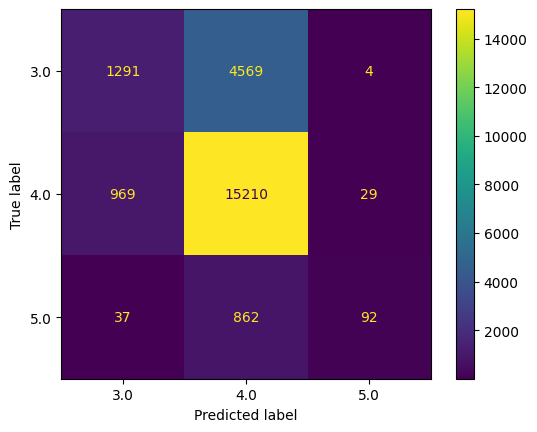

test_3.0_f1-score    0.316005
test_4.0_f1-score    0.825534
test_5.0_f1-score    0.163710
test_accuracy        0.719464
dtype: float64

In [14]:
X_preds = pd.DataFrame({'GaussianNB_preds' : gnb_pred,
                        'CategoricalNB_preds' : cnb_pred,
                        'MultinomialNB_preds' : mnb_pred})

# meta-classifier
stack_nb = CategoricalNB()
stack_nb.fit(X_preds, y)  # input = base models' predictions
cross_val_report(stack_nb, X_preds, y)[1]

## Altogether: Generate Model

In [15]:
from sklearn.base import ClassifierMixin, BaseEstimator

In [16]:
class StackingNB(ClassifierMixin, BaseEstimator):

    def __init__(self, classifiers, metaclassifier, feature_sets):
        self.classifiers = classifiers
        self.metaclassifier = metaclassifier
        self.feature_sets = feature_sets

    def fit(self, X, y):
        base_preds = []
        for clf, feature_set in zip(self.classifiers, self.feature_sets):
            clf.fit(X[feature_set], y)  # base classifier uses a subset of features
        
        X_meta = self._predict_base(X) # output of the base classifiers
        self.metaclassifier.fit(X_meta, y) # # output of the base classifiers = input for meta-classifier
        return self
    
    def _predict_base(self, X):
        y_hats = []
        for clf, feature_set in zip(self.classifiers, self.feature_sets):
            y_hat = clf.predict(X[feature_set])
            y_hats.append(y_hat)
        
        y_hats = pd.DataFrame({get_model_name(self.classifiers[i])+'_pred' : y_hats[i] 
                                for i in range(len(self.classifiers))})
        assert y_hats.shape[0] == X.shape[0] # check that the number of rows yhats matches the number of rows in the input data X
        return y_hats
    
    def predict(self, X): 
        X_meta = self._predict_base(X)
        y_hat = self.metaclassifier.predict(X_meta)
        return y_hat
    
    # for completeness
    def predict_proba(self, X): 
        X_meta = self._predict_base(X)
        return self.metaclassifier.predict_proba(X_meta)
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return accuracy_score(y, y_hat)

## Attempt 1: Using all features

StackingNB prediction took 0.5940728187561035 seconds
   test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0           0.333333           0.827586           0.121739       0.722583
1           0.310345           0.826205           0.166667       0.719983
2           0.303861           0.824609           0.076190       0.716948
3           0.324723           0.829401           0.178571       0.724631
4           0.342926           0.826514           0.196429       0.723764
5           0.314634           0.826536           0.210526       0.720295
6           0.290446           0.827104           0.166667       0.720295
7           0.306533           0.827698           0.235294       0.722463
8           0.291771           0.822258           0.111111       0.713356
9           0.271447           0.823783           0.175439       0.714224


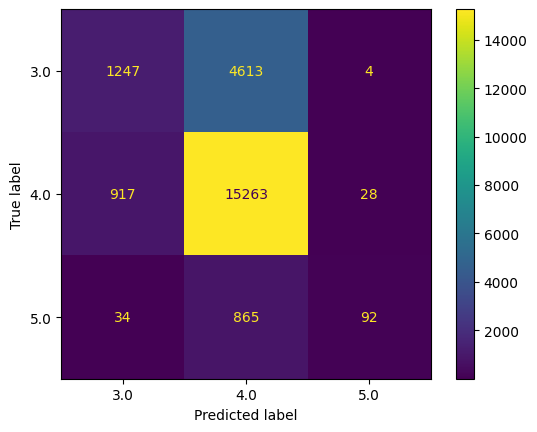

test_3.0_f1-score    0.309002
test_4.0_f1-score    0.826169
test_5.0_f1-score    0.163863
test_accuracy        0.719854
dtype: float64

In [17]:
initial_feature_sets = [GAUSSIAN_FEATURES, CATEGORICAL_FEATURES, MULTINOMIAL_FEATURES]

base_classifiers = [GaussianNB(),
                    CategoricalNB(alpha=1, min_categories=N_CAT_VALUES),
                    MultinomialNB(alpha=0.1)]

meta_classifier = CategoricalNB()
snb = StackingNB(base_classifiers, meta_classifier, initial_feature_sets)
snb.fit(X, y)

y_pred, snb_report = cross_val_report(snb, X, y)
snb_report

## Attempt 2: Using selected features

In [18]:
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X[MULTINOMIAL_FEATURES], y)
pvals = pd.DataFrame(chi2_selector.pvalues_, index=chi2_selector.feature_names_in_, columns=['p-value'])
filtered_mn_features = pvals[pvals['p-value'] < 0.01].index.tolist()
print(len(filtered_mn_features), "multinomial features are significant.")
filtered_mn_features

29 multinomial features are significant.


['civil_war',
 'african_american',
 'early_modern',
 'untold_story',
 'practical_guide',
 'study_guide',
 'cultural_history',
 'lesbian_gay',
 'life_death',
 'love_story',
 'revised_edition',
 'ultimate_guide',
 'year old',
 'american history',
 'anyone interested',
 'first time',
 'best selling',
 'real world',
 'case study',
 'black white',
 'award winning',
 'best friend',
 'book offer',
 'many year',
 'present day',
 'well known',
 'href http',
 'time book',
 'paperback edition']

In [19]:
f_selector = SelectKBest(k=2)
X_filtered_f = f_selector.fit_transform(X[GAUSSIAN_FEATURES + CATEGORICAL_FEATURES], y)
fvals = pd.DataFrame(f_selector.pvalues_, index=f_selector.feature_names_in_, columns=['F-value'])
fvals.sort_values('F-value')

F-value
pagesNumber   1.939041e-44
PublishYear   4.982373e-33
PublishDay    3.779786e-03
Authors       3.607589e-01
Publisher     8.375307e-01
PublishMonth  8.957847e-01

In [20]:
filtered_gaus_features = ['pagesNumber', 'PublishYear']
filtered_cat_features = ['Authors']
filtered_feature_sets = [filtered_gaus_features, filtered_cat_features, filtered_mn_features]
X_filtered = X[filtered_gaus_features + filtered_cat_features + filtered_mn_features]
X_filtered

pagesNumber  PublishYear  Authors  civil_war  african_american  \
0              0.0         13.0   8046.0        0.0               0.0   
1              2.0         12.0   6185.0        0.0               0.0   
2              0.0         13.0   3220.0        0.0               0.0   
3              1.0         13.0   2368.0        0.0               0.0   
4              1.0         13.0  15253.0        0.0               0.0   
...            ...          ...      ...        ...               ...   
23058          0.0         12.0   6887.0        0.0               0.0   
23059          0.0         13.0   3613.0        0.0               0.0   
23060          0.0         12.0   2054.0        0.0               0.0   
23061          0.0         13.0   7029.0        0.0               0.0   
23062          0.0         13.0  16598.0        0.0               0.0   

       early_modern  untold_story  practical_guide  study_guide  \
0               0.0           0.0              0.0          0.0   
1               0.0           0.0              0.0          0.0   
2               0.0           0.0              0.0          0.0   
3               0.0           0.0              0.0          0.0   
4               0.0           0.0              0.0          0.0   
...             ...           ...              ...          ...   
23058           0.0           0.0              0.0          0.0   
23059           0.0           0.0              0.0          0.0   
23060           0.0           0.0              0.0          0.0   
23061           0.0           0.0              0.0          0.0   
23062           0.0           0.0              0.0          0.0   

       cultural_history  ...  black white  award winning  best friend  \
0                   0.0  ...          0.0            0.0          0.0   
1                   0.0  ...          0.0            0.0          0.0   
2                   0.0  ...          0.0            0.0          0.0   
3                   0.0  ...          0.0            0.0          0.0   
4                   0.0  ...          0.0            0.0          0.0   
...                 ...  ...          ...            ...          ...   
23058               0.0  ...          0.0            0.0          0.0   
23059               0.0  ...          0.0            0.0          0.0   
23060               0.0  ...          0.0            0.0          0.0   
23061               0.0  ...          0.0            0.0          0.0   
23062               0.0  ...          0.0            0.0          0.0   

       book offer  many year  present day  well known  href http  time book  \
0             0.0        0.0          0.0         0.0        0.0        0.0   
1             0.0        0.0          0.0         0.0        0.0        0.0   
2             0.0        0.0          0.0         0.0        0.0        0.0   
3             0.0        0.0          0.0         0.0        0.0        0.0   
4             0.0        0.0          0.0         0.0        0.0        0.0   
...           ...        ...          ...         ...        ...        ...   
23058         0.0        0.0          0.0         0.0        0.0        0.0   
23059         0.0        0.0          0.0         0.0        0.0        0.0   
23060         0.0        0.0          0.0         0.0        0.0        0.0   
23061         0.0        0.0          0.0         0.0        0.0        0.0   
23062         0.0        0.0          0.0         0.0        0.0        0.0   

       paperback edition  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  
...                  ...  
23058                0.0  
23059                0.0  
23060                0.0  
23061                0.0  
23062                0.0  

[23063 rows x 32 columns]

StackingNB prediction took 0.9926567077636719 seconds
   test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0           0.304348           0.829229           0.291971       0.724317
1           0.263852           0.826145           0.260163       0.718682
2           0.302326           0.829741           0.250000       0.725184
3           0.279627           0.832710           0.252101       0.727667
4           0.303595           0.834894           0.225806       0.732003
5           0.277704           0.832218           0.285714       0.727233
6           0.275132           0.829673           0.262295       0.723764
7           0.261104           0.830391           0.290076       0.723330
8           0.296199           0.830918           0.211382       0.725932
9           0.258856           0.830490           0.269841       0.724198


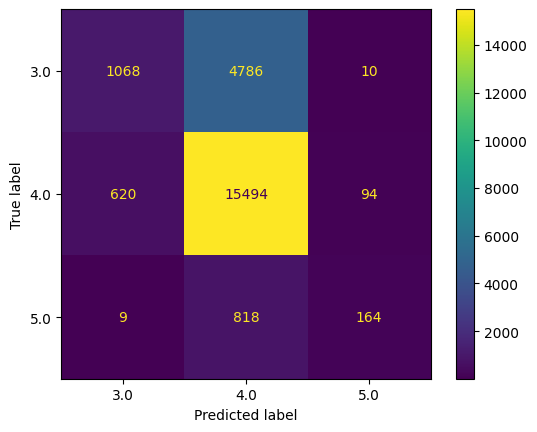

test_3.0_f1-score    0.282274
test_4.0_f1-score    0.830641
test_5.0_f1-score    0.259935
test_accuracy        0.725231
dtype: float64

In [21]:
base_classifiers = [GaussianNB(),
                    CategoricalNB(alpha=0.1, min_categories=N_CAT_VALUES[0]),
                    MultinomialNB(alpha=0.1)]

snb = StackingNB(base_classifiers, meta_classifier, filtered_feature_sets)
snb.fit(X_filtered, y)

y_pred, snb_report = cross_val_report(snb, X_filtered, y)
snb_report

## Stacking CV Classifier

In [22]:
# https://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/#example-4-stacking-of-classifiers-that-operate-on-different-feature-subsets
from mlxtend.classifier import StackingCVClassifier
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [23]:
gnb = make_pipeline(ColumnSelector(filtered_gaus_features),
                      GaussianNB())
cnb = make_pipeline(ColumnSelector(filtered_cat_features),
                      CategoricalNB(alpha=0.1, min_categories=N_CAT_VALUES[0]))
mnb = make_pipeline(ColumnSelector(filtered_mn_features),
                      MultinomialNB(alpha=0.1))

cvsnb = StackingCVClassifier(classifiers=[gnb, cnb, mnb], 
                            meta_classifier=LogisticRegression(),
                            random_state=30027)

cvsnb.fit(X_filtered, y)

StackingCVClassifier(classifiers=[Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=['pagesNumber',
                                                                        'PublishYear'])),
                                                  ('gaussiannb',
                                                   GaussianNB())]),
                                  Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=['Authors'])),
                                                  ('categoricalnb',
                                                   CategoricalNB(alpha=0.1,
                                                                 min_categories=19244))]),
                                  Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=['civil_war'...
                                                                        'american '
                                                                        'history',
                                                                        'anyone '
                                                                        'interested',
                                                                        'first '
                                                                        'time',
                                                                        'best '
                                                                        'selling',
                                                                        'real '
                                                                        'world',
                                                                        'case '
                                                                        'study',
                                                                        'black '
                                                                        'white',
                                                                        'award '
                                                                        'winning',
                                                                        'best '
                                                                        'friend',
                                                                        'book '
                                                                        'offer',
                                                                        'many '
                                                                        'year',
                                                                        'present '
                                                                        'day',
                                                                        'well '
                                                                        'known',
                                                                        'href '
                                                                        'http',
                                                                        'time '
                                                                        'book',
                                                                        'paperback '
                                                                        'edition'])),
                                                  ('multinomialnb',
                                                   MultinomialNB(alpha=0.1))])],
                     meta_classifier=LogisticRegression(), random_state=30027)

## Hyperparameter tuning

In [24]:
cvsnb.get_params()

{'classifiers': [Pipeline(steps=[('columnselector',
                   ColumnSelector(cols=['pagesNumber', 'PublishYear'])),
                  ('gaussiannb', GaussianNB())]),
  Pipeline(steps=[('columnselector', ColumnSelector(cols=['Authors'])),
                  ('categoricalnb',
                   CategoricalNB(alpha=0.1, min_categories=19244))]),
  Pipeline(steps=[('columnselector',
                   ColumnSelector(cols=['civil_war', 'african_american',
                                        'early_modern', 'untold_story',
                                        'practical_guide', 'study_guide',
                                        'cultural_history', 'lesbian_gay',
                                        'life_death', 'love_story',
                                        'revised_edition', 'ultimate_guide',
                                        'year old', 'american history',
                                        'anyone interested', 'first time',
                        

In [25]:
param_grid = {'pipeline-2__categoricalnb__alpha': [i/100 for i in range(1,42,5)], 
              'pipeline-3__multinomialnb__alpha': [i/100 for i in range(1,42,5)]}

grid = tune_hyperparameter(cvsnb, param_grid, X_filtered, y, cv=2)
grid

Fitting 2 folds for each of 81 candidates, totalling 162 fits
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.01; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.01; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.06; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.06; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.11; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.11; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.16; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.16; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.21; tot

[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.11; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.16; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.16; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.21; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.21; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.26; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.26; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.31; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.21, pipeline-3__multinomialnb__alpha=0.31; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.21

[CV] END pipeline-2__categoricalnb__alpha=0.41, pipeline-3__multinomialnb__alpha=0.26; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.41, pipeline-3__multinomialnb__alpha=0.31; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.41, pipeline-3__multinomialnb__alpha=0.31; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.41, pipeline-3__multinomialnb__alpha=0.36; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.41, pipeline-3__multinomialnb__alpha=0.36; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.41, pipeline-3__multinomialnb__alpha=0.41; total time=   0.2s
[CV] END pipeline-2__categoricalnb__alpha=0.41, pipeline-3__multinomialnb__alpha=0.41; total time=   0.2s


params  \
0   {'pipeline-2__categoricalnb__alpha': 0.01, 'pi...   
1   {'pipeline-2__categoricalnb__alpha': 0.01, 'pi...   
2   {'pipeline-2__categoricalnb__alpha': 0.01, 'pi...   
3   {'pipeline-2__categoricalnb__alpha': 0.01, 'pi...   
4   {'pipeline-2__categoricalnb__alpha': 0.01, 'pi...   
..                                                ...   
76  {'pipeline-2__categoricalnb__alpha': 0.41, 'pi...   
77  {'pipeline-2__categoricalnb__alpha': 0.41, 'pi...   
78  {'pipeline-2__categoricalnb__alpha': 0.41, 'pi...   
79  {'pipeline-2__categoricalnb__alpha': 0.41, 'pi...   
80  {'pipeline-2__categoricalnb__alpha': 0.41, 'pi...   

    mean_test_3.0_precision  std_test_3.0_precision  rank_test_3.0_precision  \
0                  0.614670                0.003810                       55   
1                  0.614670                0.003810                       55   
2                  0.614670                0.003810                       55   
3                  0.614670                0.003810                       55   
4                  0.614385                0.003525                       67   
..                      ...                     ...                      ...   
76                 0.622966                0.001432                       14   
77                 0.622966                0.001432                       14   
78                 0.622966                0.001432                       14   
79                 0.622966                0.001432                       14   
80                 0.622966                0.001432                       14   

    mean_test_3.0_recall  std_test_3.0_recall  rank_test_3.0_recall  \
0               0.139836             0.001705                     1   
1               0.139836             0.001705                     1   
2               0.139836             0.001705                     1   
3               0.139836             0.001705                     1   
4               0.139666             0.001535                    13   
..                   ...                  ...                   ...   
76              0.131310             0.001364                    77   
77              0.131310             0.001364                    77   
78              0.131310             0.001364                    77   
79              0.131310             0.001364                    77   
80              0.131310             0.001364                    77   

    mean_test_3.0_f1-score  std_test_3.0_f1-score  rank_test_3.0_f1-score  \
0                 0.227838               0.002525                       1   
1                 0.227838               0.002525                       1   
2                 0.227838               0.002525                       1   
3                 0.227838               0.002525                       1   
4                 0.227593               0.002280                      17   
..                     ...                    ...                     ...   
76                0.216899               0.001948                      77   
77                0.216899               0.001948                      77   
78                0.216899               0.001948                      77   
79                0.216899               0.001948                      77   
80                0.216899               0.001948                      77   

    ...  rank_test_5.0_precision  mean_test_5.0_recall  std_test_5.0_recall  \
0   ...                       69              0.042386             0.004079   
1   ...                       69              0.042386             0.004079   
2   ...                       69              0.042386             0.004079   
3   ...                       69              0.042386             0.004079   
4   ...                       69              0.042386             0.004079   
..  ...                      ...                   ...                  ...   
76  ...                        1              0.024218             0.0

In [26]:
r = re.compile('(^(rank_test).*(f1-score|accuracy)$)|(mean_test_accuracy)|(params)')
score_metrics = list(filter(r.match, grid.columns))
grid.loc[grid['rank_test_5.0_precision'] < 20][score_metrics]

params  rank_test_3.0_f1-score  \
36  {'pipeline-2__categoricalnb__alpha': 0.21, 'pi...                      32   
37  {'pipeline-2__categoricalnb__alpha': 0.21, 'pi...                      32   
38  {'pipeline-2__categoricalnb__alpha': 0.21, 'pi...                      32   
39  {'pipeline-2__categoricalnb__alpha': 0.21, 'pi...                      32   
40  {'pipeline-2__categoricalnb__alpha': 0.21, 'pi...                      49   
41  {'pipeline-2__categoricalnb__alpha': 0.21, 'pi...                      49   
42  {'pipeline-2__categoricalnb__alpha': 0.21, 'pi...                      49   
43  {'pipeline-2__categoricalnb__alpha': 0.21, 'pi...                      49   
44  {'pipeline-2__categoricalnb__alpha': 0.21, 'pi...                      49   
45  {'pipeline-2__categoricalnb__alpha': 0.26, 'pi...                      36   
46  {'pipeline-2__categoricalnb__alpha': 0.26, 'pi...                      36   
47  {'pipeline-2__categoricalnb__alpha': 0.26, 'pi...                      36   
48  {'pipeline-2__categoricalnb__alpha': 0.26, 'pi...                      36   
49  {'pipeline-2__categoricalnb__alpha': 0.26, 'pi...                      54   
50  {'pipeline-2__categoricalnb__alpha': 0.26, 'pi...                      54   
51  {'pipeline-2__categoricalnb__alpha': 0.26, 'pi...                      54   
52  {'pipeline-2__categoricalnb__alpha': 0.26, 'pi...                      54   
53  {'pipeline-2__categoricalnb__alpha': 0.26, 'pi...                      54   
54  {'pipeline-2__categoricalnb__alpha': 0.31, 'pi...                      36   
55  {'pipeline-2__categoricalnb__alpha': 0.31, 'pi...                      36   
56  {'pipeline-2__categoricalnb__alpha': 0.31, 'pi...                      36   
57  {'pipeline-2__categoricalnb__alpha': 0.31, 'pi...                      36   
58  {'pipeline-2__categoricalnb__alpha': 0.31, 'pi...                      54   
59  {'pipeline-2__categoricalnb__alpha': 0.31, 'pi...                      54   
60  {'pipeline-2__categoricalnb__alpha': 0.31, 'pi...                      54   
61  {'pipeline-2__categoricalnb__alpha': 0.31, 'pi...                      54   
62  {'pipeline-2__categoricalnb__alpha': 0.31, 'pi...                      54   
63  {'pipeline-2__categoricalnb__alpha': 0.36, 'pi...                      64   
64  {'pipeline-2__categoricalnb__alpha': 0.36, 'pi...                      64   
65  {'pipeline-2__categoricalnb__alpha': 0.36, 'pi...                      64   
66  {'pipeline-2__categoricalnb__alpha': 0.36, 'pi...                      64   
67  {'pipeline-2__categoricalnb__alpha': 0.36, 'pi...                      68   
68  {'pipeline-2__categoricalnb__alpha': 0.36, 'pi...                      68   
69  {'pipeline-2__categoricalnb__alpha': 0.36, 'pi...                      68   
70  {'pipeline-2__categoricalnb__alpha': 0.36, 'pi...                      68   
71  {'pipeline-2__categoricalnb__alpha': 0.36, 'pi...                      68   
72  {'pipeline-2__categoricalnb__alpha': 0.41, 'pi...                      73   
73  {'pipeline-2__categoricalnb__alpha': 0.41, 'pi...                      73   
74  {'pipeline-2__categoricalnb__alpha': 0.41, 'pi...                      73   
75  {'pipeline-2__categoricalnb__alpha': 0.41, 'pi...                      73   
76  {'pipeline-2__categoricalnb__alpha': 0.41, 'pi...                      77   
77  {'pipeline-2__categoricalnb__alpha': 0.41, 'pi...                      77   
78  {'pipeline-2__categoricalnb__alpha': 0.41, 'pi...                      77   
79  {'pipeline-2__categoricalnb__alpha': 0.41, 'pi...                      77   
80  {'pipeline-2__categoricalnb__alpha': 0.41, 'pi...                      77   

    rank_test_4.0_f1-score  rank_test_5.0_f1-score  mean_test_accuracy  \
36                      25                      30            0.717860   
37                      25                      30            0.717860   
38                      25                      30            0.717860   
39                      

In [27]:
grid.loc[[7]]['params'].values

array([{'pipeline-2__categoricalnb__alpha': 0.01, 'pipeline-3__multinomialnb__alpha': 0.36}],
      dtype=object)

In [41]:
grid.loc[grid['rank_test_accuracy'] < 20][score_metrics]
grid.iloc[23,0]

{'pipeline-2__categoricalnb__alpha': 0.11,
 'pipeline-3__multinomialnb__alpha': 0.26}

In [42]:
gnb = make_pipeline(ColumnSelector(filtered_gaus_features),
                      GaussianNB())
cnb = make_pipeline(ColumnSelector(filtered_cat_features),
                      CategoricalNB(alpha=0.11, min_categories=N_CAT_VALUES[0]))
mnb = make_pipeline(ColumnSelector(filtered_mn_features),
                      MultinomialNB(alpha=0.26))

cvsnb = StackingCVClassifier(classifiers=[gnb, cnb, mnb], 
                            meta_classifier=LogisticRegression(),
                            random_state=30027)

cvsnb.fit(X_filtered, y)

StackingCVClassifier(classifiers=[Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=['pagesNumber',
                                                                        'PublishYear'])),
                                                  ('gaussiannb',
                                                   GaussianNB())]),
                                  Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=['Authors'])),
                                                  ('categoricalnb',
                                                   CategoricalNB(alpha=0.11,
                                                                 min_categories=19244))]),
                                  Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=['civil_war...
                                                                        'american '
                                                                        'history',
                                                                        'anyone '
                                                                        'interested',
                                                                        'first '
                                                                        'time',
                                                                        'best '
                                                                        'selling',
                                                                        'real '
                                                                        'world',
                                                                        'case '
                                                                        'study',
                                                                        'black '
                                                                        'white',
                                                                        'award '
                                                                        'winning',
                                                                        'best '
                                                                        'friend',
                                                                        'book '
                                                                        'offer',
                                                                        'many '
                                                                        'year',
                                                                        'present '
                                                                        'day',
                                                                        'well '
                                                                        'known',
                                                                        'href '
                                                                        'http',
                                                                        'time '
                                                                        'book',
                                                                        'paperback '
                                                                        'edition'])),
                                                  ('multinomialnb',
                                                   MultinomialNB(alpha=0.26))])],
                     meta_classifier=LogisticRegression(), random_state=30027)

StackingCVClassifier prediction took 2.356658935546875 seconds
   test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0           0.311392           0.828633           0.294118       0.724317
1           0.272608           0.826717           0.260163       0.719983
2           0.310256           0.830504           0.227642       0.726485
3           0.291339           0.831065           0.077670       0.725065
4           0.303595           0.834671           0.211382       0.731570
5           0.282695           0.830926           0.205128       0.725065
6           0.297262           0.831364           0.247934       0.727233
7           0.271277           0.830249           0.290076       0.723764
8           0.307292           0.832348           0.213115       0.728534
9           0.270636           0.831688           0.258065       0.726366


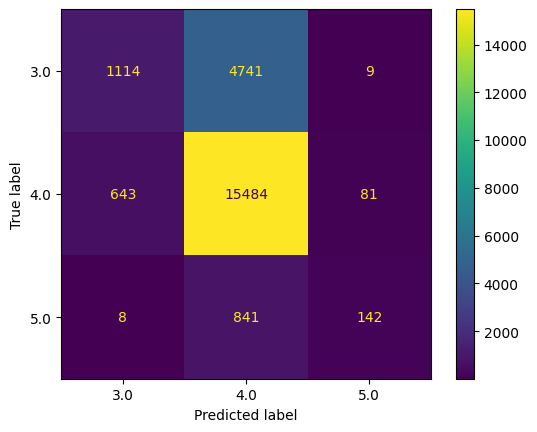

test_3.0_f1-score    0.291835
test_4.0_f1-score    0.830817
test_5.0_f1-score    0.228529
test_accuracy        0.725838
dtype: float64

In [43]:
y_pred, cvsnb_report = cross_val_report(cvsnb, X_filtered, y)
cvsnb_report